In [127]:

%matplotlib widget

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys
from IPython.display import Markdown, display
from mpl_toolkits.axes_grid1 import host_subplot
from matplotlib.widgets import RangeSlider
import igc_tools
import flight_log_tools
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [128]:
IGC_file = "igc_data/Doug DeGeorge.923.60.igc"

In [129]:
flight_log = flight_log_tools.IGCLog(IGC_file)

Index(['time', 'time_iso', 'lat', 'lon', 'fix_validity', 'pressure_altitude',
       'gnss_altitude', 'time_pandas', 'seconds_delta',
       'pressure_altitude_delta', 'gnss_altitude_delta', 'sink_rate_pa',
       'sink_rate_gnss', 'meters_north', 'meters_east', 'prev_lat', 'prev_lon',
       'distance_m', 'speed_ms', 'glide_pa', 'glide_gnss'],
      dtype='object')
         time  time_iso        lat         lon fix_validity  \
0    21:32:30  21:32:30  37.475600 -121.861150            A   
1    21:32:31  21:32:31  37.475600 -121.861167            A   
2    21:32:32  21:32:32  37.475600 -121.861167            A   
3    21:32:33  21:32:33  37.475600 -121.861167            A   
4    21:32:34  21:32:34  37.475600 -121.861167            A   
..        ...       ...        ...         ...          ...   
641  21:43:11  21:43:11  37.457950 -121.866333            A   
642  21:43:12  21:43:12  37.457950 -121.866333            A   
643  21:43:13  21:43:13  37.457967 -121.866317            A   
6

In [136]:
print(np.cos(flight_log.dataframe["lat"] * np.pi/180))

0      0.793613
1      0.793613
2      0.793613
3      0.793613
4      0.793613
         ...   
641    0.793800
642    0.793800
643    0.793800
644    0.793800
645    0.793800
Name: lat, Length: 646, dtype: float64


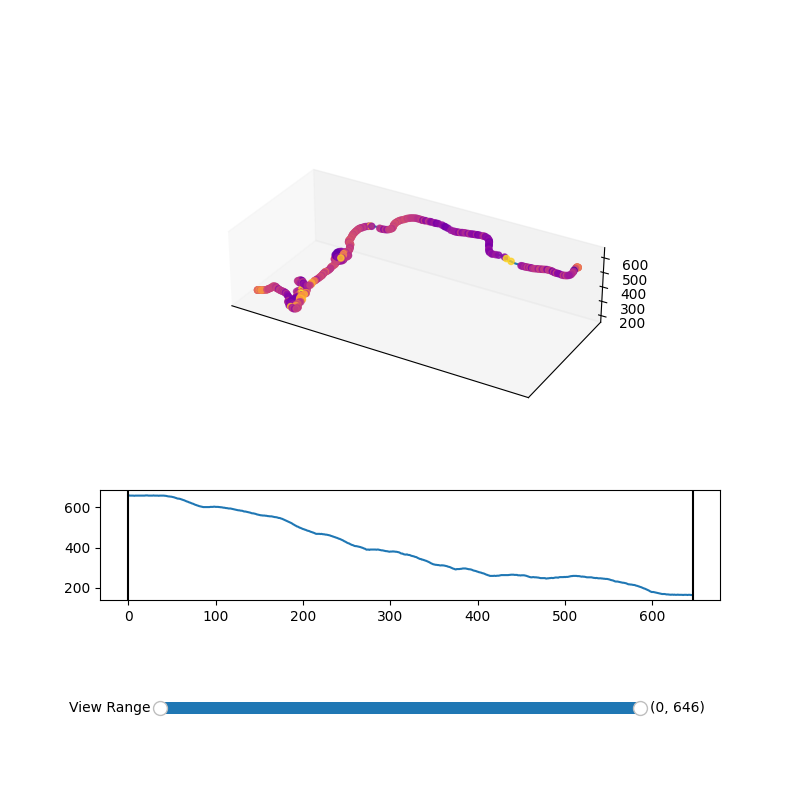

In [131]:
fig = plt.figure(figsize=(8, 8))
ax_3d = fig.add_subplot(4, 1, (1, 3), projection='3d')
ax_3d.scatter(flight_log.dataframe["meters_north"], flight_log.dataframe["meters_east"], flight_log.dataframe["pressure_altitude"], cmap = "plasma", c = flight_log.dataframe["glide_pa"], alpha = 0.8)
ax_3d.plot(flight_log.dataframe["meters_north"], flight_log.dataframe["meters_east"], flight_log.dataframe["pressure_altitude"])
ax_3d.grid(False)
ax_3d.set_xticks([])
ax_3d.set_yticks([])


ax_alt = fig.add_subplot(4, 1, 4)
ax_alt.plot(flight_log.dataframe["pressure_altitude"])
fig.subplots_adjust(bottom=0.25)

slider_ax = fig.add_axes([0.20, 0.1, 0.60, 0.03])
slider = RangeSlider(slider_ax, "View Range", 0, len(flight_log.dataframe), valinit = (0, len(flight_log.dataframe)), valfmt='%d')

# Create the Vertical lines on the histogram
lower_limit_line = ax_alt.axvline(slider.val[0], color='k')
upper_limit_line = ax_alt.axvline(slider.val[1], color='k')

    
def get_range(field, idx):    
    lower_limit = flight_log.dataframe[field].iloc[int(idx[0]):int(idx[1])].min()
    upper_limit = flight_log.dataframe[field].iloc[int(idx[0]):int(idx[1])].max()
    return (lower_limit, upper_limit)
    
def update(val):
    # The val passed to a callback by the RangeSlider will
    # be a tuple of (min, max)
    
    # Update the position of the vertical lines
    lower_limit_line.set_xdata([val[0], val[0]])
    upper_limit_line.set_xdata([val[1], val[1]])
    
    
    north_range = get_range("meters_north", val)
    north_span = north_range[1] - north_range[0]
    north_middle = north_range[0] + north_span/2
    
    east_range = get_range("meters_east", val)
    east_span = east_range[1] - east_range[0]
    east_middle = east_range[0] + east_span/2

    z_range = get_range("pressure_altitude", val)

    if (north_span > east_span):
        ax_3d.set_xlim(north_range)
        ax_3d.set_ylim(east_middle - east_span/2, east_middle + east_span/2)
    else:
        ax_3d.set_xlim(north_middle - north_span/2, north_middle + north_span/2)
        ax_3d.set_ylim(east_range)
        
    ax_3d.set_zlim(z_range)
    
    ax_3d.set_aspect("equal")
    ax_3d.get_yaxis().set_visible(False)
    ax_3d.get_xaxis().set_visible(False)
    
    # Redraw the figure to ensure it updates
#     fig.canvas.draw_idle()
#     fig_alt.canvas.draw_idle()

slider.on_changed(update)
update((0, len(flight_log.dataframe)))
plt.show()

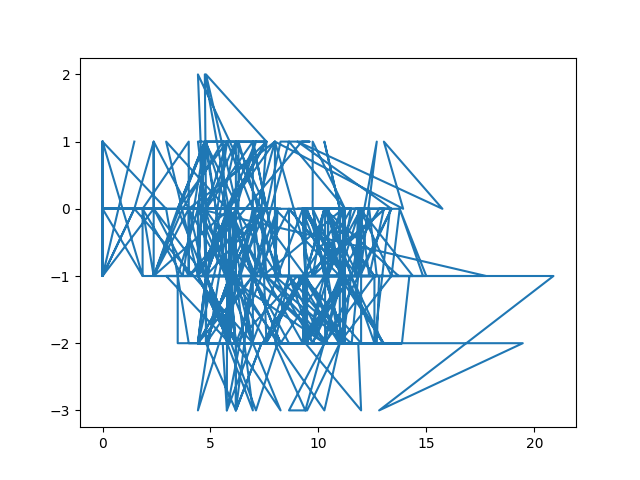

In [132]:
fig, ax = plt.subplots()
ax.plot(flight_log.dataframe["speed_ms"], flight_log.dataframe["sink_rate_pa"])


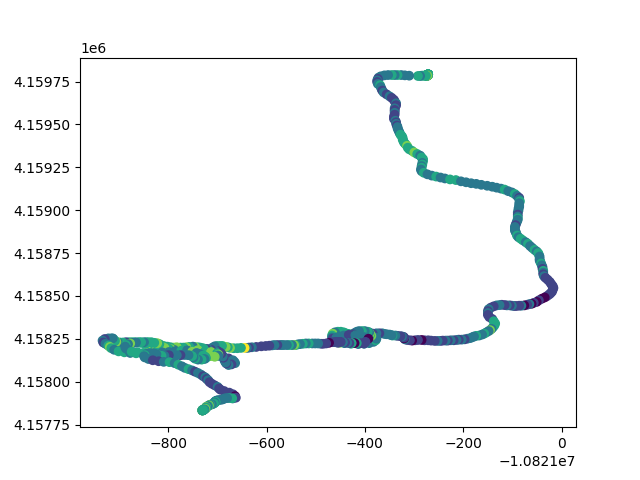

In [133]:
fig, ax = plt.subplots()
ax.scatter(flight_log.dataframe["meters_east"], 
           flight_log.dataframe["meters_north"], 
           c = flight_log.dataframe["sink_rate_pa"])


0     -2.126878
1     -2.126879
2     -2.126879
3     -2.126879
4     -2.126879
         ...   
641   -2.126969
642   -2.126969
643   -2.126968
644   -2.126968
645   -2.126968
Name: lon, Length: 646, dtype: float64
